# Different delay widths

In this notebook we want to analyse the effect of different priors for the delay width.

In [2]:
import pickle
import sys
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import os
import pandas as pd
import datetime
import matplotlib.ticker as ticker
import pymc3 as pm
import arviz as az
sys.path.append("../../")
sys.path.append("../../covid19_inference")
sys.path.append("../")

import covid19_soccer
from covid19_soccer.plot.utils import get_from_trace
import covid19_inference as cov19
#import covid19_inference as cov19
from header_plotting import *


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def load_function(country, offset=0, mwd="1.0", interval_cps="10.0", f_fem="0.33", f_robust="1.0", len="normal"):
        fstr=lambda tune, draws, max_treedepth, folder: (f"/data.nst/share/soccer_project/{folder}/run"+
            f"-beta=False"+
            f"-country={country}"+
            f"-offset_data={offset}"+
            f"-prior_delay=-1"+
            f"-median_width_delay={mwd}"+
            f"-interval_cps={interval_cps}"+
            f"-f_fem={f_fem}"+
            f"-len=normal"+
            f"-abs_sine=False"+
            f"-t={tune}"+
            f"-d={draws}"+
            f"-max_treedepth={max_treedepth}.pkl")
        if not f_robust == "1.0":
            fstr=lambda tune, draws, max_treedepth, folder: (f"/data.nst/share/soccer_project/covid_uefa_traces14/run"+
                f"-beta=False"+
                f"-country={country}"+
                f"-offset_data={offset}"+
                f"-prior_delay=-1"+
                f"-median_width_delay={mwd}"+
                f"-interval_cps={interval_cps}"+
                f"-f_fem={f_fem}"+
                f"-len=normal"+
                f"-abs_sine=False"+
                f"-f_robust={f_robust}"+
                f"-t={tune}"+
                f"-d={draws}"+
                f"-max_treedepth={max_treedepth}.pkl")
        model = None
        
        tune, draws, max_treedepth = (2000, 4000, 12)
        folder="covid_uefa_traces14_robustness"
        if os.path.exists(fstr(tune, draws, max_treedepth, folder)):
            model, trace = load(fstr(tune, draws, max_treedepth, folder))
            print(f"Use {draws} sample runs for {country}")
            
        tune, draws, max_treedepth = (1000, 2000, 12)
        folder="covid_uefa_traces15"
        if os.path.exists(fstr(tune, draws, max_treedepth, folder)) and model is None:
            model, trace = load(fstr(tune, draws, max_treedepth, folder))
            print(f"Use {draws} sample runs for {country}")
        tune, draws, max_treedepth = (500, 1000, 12)
        if os.path.exists(fstr(tune, draws, max_treedepth, folder)) and model is None:
            model, trace = load(fstr(tune, draws, max_treedepth, folder))
            print(f"Use {draws} sample runs for {country}")
        
        if model is None: 
            print(fstr(tune, draws, max_treedepth, folder), " not found")
            return None, None
        
        # Remove chains with likelihood larger than -200, should only be the case for 2 chains in France
        mask = (np.mean(trace.sample_stats.lp, axis=1)>-200)
        trace.posterior = trace.posterior.sel(chain=~mask)
        return model, trace

In [5]:
save_kwargs = {
    "transparent":True,
    "dpi":300,
    "bbox_inches":"tight"
}
fig_path = "../figures/SI"

def load(fstr):
    with open(fstr, "rb") as f:
         return pickle.load(f)


In [6]:
countries = ['England', 'Czechia', 'Scotland', 'Spain', 'Italy', 'Slovakia',
       'Germany', 'Austria', 'Belgium', 'France', 'Portugal',
       'Netherlands']
traces, models, dls = {}, {}, {}
for country in tqdm(countries):
    models_t, traces_t, dls_t = [],[],[]
    for f_robust in ["0.5", "1.0", "2.0"]:
        model,trace = load_function(country, f_robust= f_robust)

        dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])
        models_t.append(model)
        traces_t.append(trace)
        dls_t.append(dl)
    models[country] = models_t
    traces[country] = traces_t
    dls[country] = dls_t

  0%|          | 0/12 [00:00<?, ?it/s]

Use 2000 sample runs for England
Use 4000 sample runs for England
Use 2000 sample runs for England
Use 2000 sample runs for Czechia
Use 4000 sample runs for Czechia
Use 2000 sample runs for Czechia
Use 2000 sample runs for Scotland
Use 4000 sample runs for Scotland
Use 2000 sample runs for Scotland
Use 2000 sample runs for Spain
Use 4000 sample runs for Spain
Use 2000 sample runs for Spain
Use 2000 sample runs for Italy
Use 4000 sample runs for Italy
Use 2000 sample runs for Italy
Use 2000 sample runs for Slovakia
Use 4000 sample runs for Slovakia
Use 2000 sample runs for Slovakia
Use 2000 sample runs for Germany
Use 4000 sample runs for Germany
Use 2000 sample runs for Germany
Use 2000 sample runs for Austria
Use 4000 sample runs for Austria
Use 2000 sample runs for Austria
Use 2000 sample runs for Belgium
Use 4000 sample runs for Belgium
Use 2000 sample runs for Belgium
Use 2000 sample runs for France
Use 4000 sample runs for France
Use 2000 sample runs for France
Use 2000 sample run

[1 0 2]
Country	50.0	2.5	97.5	16	84	>0
England0	11.520591104031872	5.167551002079245	20.57824281164743	6.607261476299574	15.779320590147572	1.0
England1	11.935177588172856	5.267378566966791	22.69459626107414	6.689633736454913	16.120701592170825	1.0
England2	11.413794602178807	5.253644934095028	19.85627829117354	6.732716814535321	15.827034324761584	1.0
[1 2 0]
Country	50.0	2.5	97.5	16	84	>0
Czechia0	9.098545419211835	2.541469864682083	15.529061903290833	5.854658269584857	12.376013408580267	0.9979375
Czechia1	9.593089919300777	3.181328176697239	16.053185226245763	6.379436537205825	12.906129818968806	0.99859375
Czechia2	9.491165181856424	2.808775947419449	16.198530190078337	6.206752277385888	12.806862819587536	0.998375
[2 1 0]
Country	50.0	2.5	97.5	16	84	>0
Scotland0	3.139201198545962	1.1871341610719377	7.9234624889259395	1.5868253685134264	6.778598286994235	1.0
Scotland1	3.2990308005456015	1.226047140552335	7.972233004422457	1.623816121833024	6.793587962436822	1.0
Scotland2	3.35145132054

WARNING  [matplotlib.font_manager] findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
WARNING  [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
WARNING  [matplotlib.font_manager] findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
WARNING  [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
WARNING  [matplotlib.font_manager] findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
WARNING  [matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


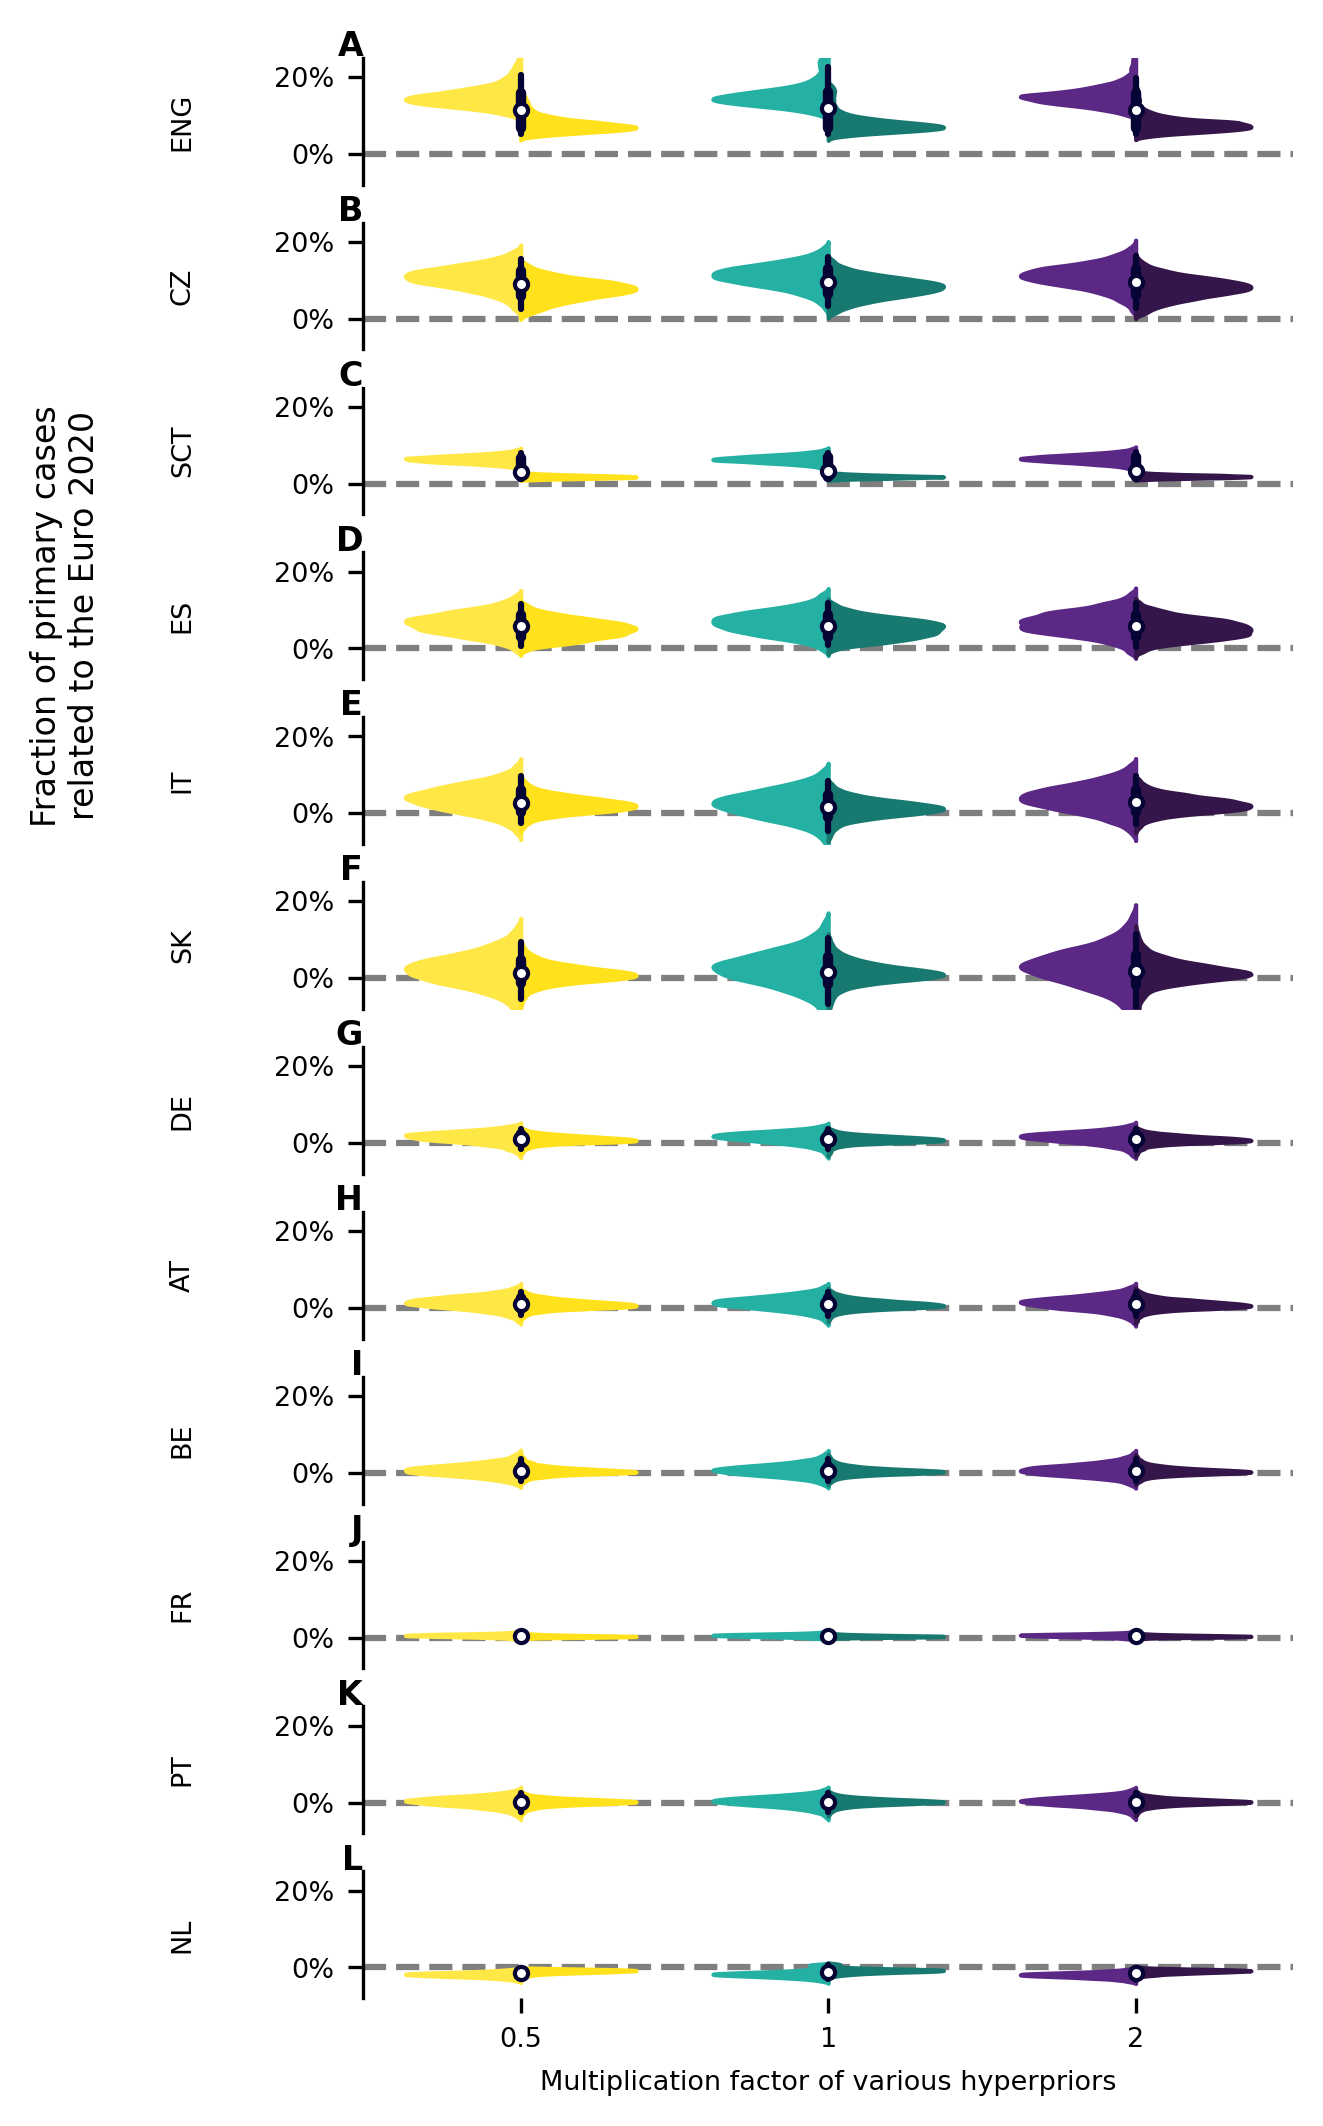

In [7]:
from covid19_soccer.plot.utils import lighten_color
from covid19_soccer.plot.rcParams import *
from matplotlib.colors import to_hex
fig, axes = plt.subplots(len(countries),1,figsize=(4,len(countries)*0.7),gridspec_kw={"hspace":0.3})

colors_base = ["#ffe530","#1e958a","#481f68"]
l = 0.9
d = 1.1


colors_mf = []
for col in colors_base:
    colors_mf.append(to_hex(lighten_color(col,l)))
    colors_mf.append(to_hex(lighten_color(col,d)))
colors_mf = np.array(colors_mf)

for i, country in enumerate(countries):
    covid19_soccer.plot.other.soccer_related_cases_overview(
        ax=axes[i],
        traces=traces[country],
        models=models[country],
        dls=dls[country],
        country_order=[0,1,2],
        remove_outliers=True,
        colors=colors_mf,
        bw=.15
        )
    axes[i].set_xticklabels(["0.5","1","2"])
    axes[i].set_ylabel(dls[country][0].countries_iso2[0].replace("GB-",""))
    axes[i].yaxis.set_label_coords(-0.18, 0.5)

    if i != len(countries)-1:
        axes[i].set_xticklabels([])
        axes[i].tick_params(bottom=False)


            
    #axes[i,1].set_ylim(0.6,2)
    #axes[i,1].set_yticks([1,1.5])
    #axes[i,1].yaxis.set_label_coords(-0.12, 0.5)
# Array of capital letters
letters = np.array(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))

# Add label letters to figure
for i, country in enumerate(countries):
    axes[i].text(
        0,
        1.22,
        letters[i],
        transform=axes[i].transAxes,
        fontsize=8,
        fontweight="bold",
        verticalalignment="top",
        ha="right",
    )

    
# set ylims
ylims = {
    "England":[-8,25],
    "Czechia":[-8,25],
    "Italy":[-8,25],
    "Scotland":[-8,25],
    "Spain":[-8,25],
    "Germany":[-8,25],
    "France":[-8,25],
    'Slovakia':[-8,25],
    'Austria':[-8,25],
    'Belgium':[-8,25],
    'Portugal':[-8,25],
    'Netherlands':[-8,25],
}
for i, country in enumerate(countries):
    axes[i].set_ylim(ylims[country])

# Set overarching y label
axes[3].text(-0.32,0.5,"Fraction of primary cases\nrelated to the Euro 2020",transform=axes[3].transAxes,rotation=90,ha="center",va="center",fontsize=8)
#axes[3].set_ylabel("Density")


axes[-1].set_xlabel("Multiplication factor of various hyperpriors")
plt.savefig(f"{fig_path}/plots_robustness_other_priors.pdf", **save_kwargs)
plt.savefig(f"{fig_path}/plots_robustness_other_priors.png", **save_kwargs)
plt.show()
plt.close(fig=fig)


In [8]:
for country in countries:
    for i in range(3):

        dl = covid19_soccer.dataloader.Dataloader_gender(countries=[country])
        dls[country][i] = dl

In [9]:
i = 0
for c in countries_pi:
    print(c)
    print("ffem_0.2",nums[i])
    print("ffem_0.5",nums[i+1])
    print("increase",(nums[i+1]-nums[i])/(nums[i]))
    i += 2



NameError: name 'countries_pi' is not defined

In [ ]:
calc_increase(ratios_soccer,1).shape

## Extended overviews

In [ ]:
from covid19_soccer.plot.overview import single_extended
for trace,model,dl in zip(traces.values(),models.values(),dls.values()):
    
    fig0 = single_extended(trace[0],model[0],dl[0])
    fig0.suptitle(f"{dl[0].countries[0]}")
    fig1 = single_extended(trace[1],model[1],dl[1])
    fig1.suptitle(f"{dl[1].countries[0]}")
    plt.show()
    plt.close(fig=fig0)
    plt.close(fig=fig1)